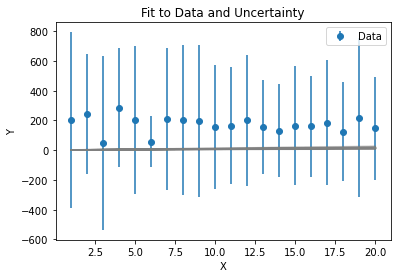

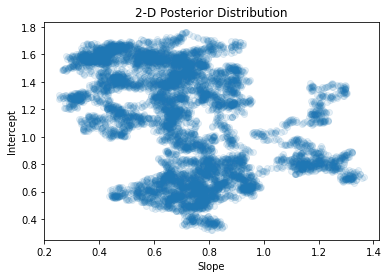

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

#data = np.genfromtxt('data/data_yerr.dat', names=True, comments='#', delimiter='&')
# Load synthetic data
data = np.genfromtxt('data/data_yerr.dat', delimiter='&', missing_values='&', filling_values=np.nan)
x_observed, y_observed, y_err = data[:, 0], data[:, 1], data[:, 2]

# Define the likelihood function for linear regression
def likelihood(x, y, sigma_y, slope, intercept):
    return np.prod(norm.pdf(y, slope * x + intercept, sigma_y))

# Define the prior function (assuming uniform priors)
def prior(slope, intercept):
    return 1.0  # Uniform prior

# Define the posterior function
def posterior(x, y, sigma_y, slope, intercept):
    return likelihood(x, y, sigma_y, slope, intercept) * prior(slope, intercept)

# Metropolis algorithm for sampling from the posterior distribution
def metropolis(x, y, sigma_y, n_samples, proposal_std):
    samples = np.zeros((n_samples, 2))
    current_params = np.random.rand(2)  # Initial parameter values

    for i in range(n_samples):
        # Propose new parameters
        proposed_params = current_params + proposal_std * np.random.randn(2)

        # Calculate acceptance ratio
        alpha = min(1, posterior(x, y, sigma_y, *proposed_params) /
                         posterior(x, y, sigma_y, *current_params))

        # Accept or reject the proposal
        if np.random.rand() < alpha:
            current_params = proposed_params

        samples[i] = current_params

    return samples

# Set parameters
n_samples = 10000
proposal_std = np.array([0.01, 0.01])  # Adjust as needed

# Run Metropolis algorithm
samples = metropolis(x_observed, y_observed, y_err, n_samples, proposal_std)

# Plot the data and sampled lines
plt.errorbar(x_observed, y_observed, yerr=y_err, fmt='o', label='Data')

for i in range(0, n_samples, n_samples // 100):
    slope, intercept = samples[i]
    plt.plot(x_observed, slope * x_observed + intercept, color='gray', alpha=0.1)

plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Fit to Data and Uncertainty')
plt.show()

# Plot the 2-D posterior distribution
plt.scatter(samples[:, 0], samples[:, 1], alpha=0.1)
plt.xlabel('Slope')
plt.ylabel('Intercept')
plt.title('2-D Posterior Distribution')
plt.show()